# Setup

In [1]:
import random
from timeit import timeit
reruns = 1000

random.seed(42)
small_dataset = random.sample(range(1, 30), 6)
large_dataset = random.sample(range(1, 100), 50)
print(small_dataset)
print(large_dataset)

[21, 4, 1, 24, 9, 8]
[29, 18, 95, 14, 87, 70, 12, 76, 55, 5, 4, 93, 28, 30, 65, 78, 89, 72, 26, 94, 54, 99, 58, 92, 36, 1, 21, 91, 44, 75, 20, 97, 71, 96, 88, 49, 7, 23, 82, 62, 39, 17, 52, 3, 47, 86, 35, 8, 25, 6]


In [2]:
def test_sorting_algorithm(arr, func, *args):
  # is_sorted = all(l[i] <= l[i+1] for i in range(len(l)-1))
  actual = func(arr, *args)
  expected = sorted(arr)
  print("Test passed!") if actual == expected else print(f"Test failed: \nExpected: {expected}, \nActual: {actual}")

# Sorting Algorithms

## Info

### Time Complexities

| Algorithm       | Best Case   | Average Case | Worst Case  |
|------------------|-------------|--------------|-------------|
| Bubble Sort      | O(n)       | O(n²)        | O(n²)       |
| Selection Sort   | O(n²)      | O(n²)        | O(n²)       |
| Insertion Sort    | O(n)       | O(n²)        | O(n²)       |
| Merge Sort       | O(n log n) | O(n log n)   | O(n log n)  |
| Quick Sort       | O(n log n) | O(n log n)   | O(n²)       |

### Space Complexities

| Algorithm       | Space Complexity |
|------------------|------------------|
| Bubble Sort      | O(1)             |
| Selection Sort   | O(1)             |
| Insertion Sort    | O(1)             |
| Merge Sort       | O(n)             |
| Quick Sort       | O(log n)         |

### Stability

- **Stable Sorts**: Merge Sort, Insertion Sort, Bubble Sort
- **Unstable Sorts**: Quick Sort, Selection Sort

### Summary

- **Bubble Sort** and **Selection Sort** are inefficient for large datasets due to their O(n²) complexity.
- **Insertion Sort** can perform better than these for small or nearly sorted datasets but has O(n²) complexity in the worst case.
- **Merge Sort** and **Quick Sort** are more efficient with O(n log n) average time complexity and are preferred for larger datasets.
- **Merge Sort** is stable and maintains the relative ordering of equal elements, while **Quick Sort** is faster on average but is not stable.


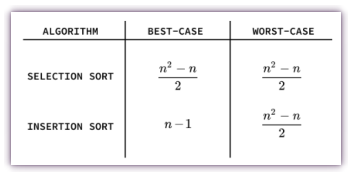

## Bubble sort

Time complexity: quadratic O(n^2)

In [3]:
def bubble_sort(arr):
  arr = arr.copy()

  for i in range(len(arr)-1, 0, -1):
    for j in range(i):
      if arr[j] > arr[j+1]:
        arr[j], arr[j+1] = arr[j+1], arr[j]

  return arr

test_sorting_algorithm([], bubble_sort)
test_sorting_algorithm(small_dataset, bubble_sort)

Test passed!
Test passed!


## Selection sort

Time complexity: quadratic O(n^2)

Selection sort works by making sure all the numbers in the unsorted segment of the array always stay greater than or equal to the numbers in the sorted segment of the array.

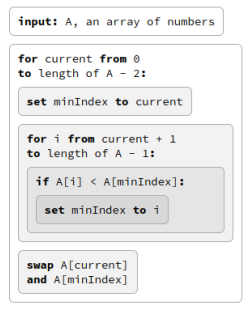

In [4]:
def selection_sort(arr):
  arr = arr.copy()

  for i in range(len(arr)-1): # last item will automatically be in correct position
    min_i = i
    for j in range(i+1, len(arr)):
      if arr[j] < arr[min_i]:
        min_i = j
    arr[i], arr[min_i] = arr[min_i], arr[i]
  return arr

test_sorting_algorithm([], selection_sort)
test_sorting_algorithm(small_dataset, selection_sort)

Test passed!
Test passed!


## Insertion sort  
  
Time complexity: quadratic O(n^2)

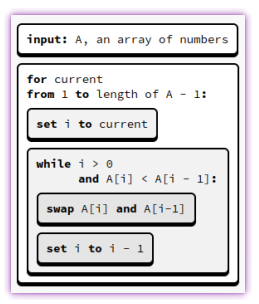

In [5]:
def insertion_sort(arr):
  arr = arr.copy()

  for i in range(1, len(arr)):
    key = arr[i] # store the current element as the key to be inserted in the right position
    j = i-1
    while j >= 0 and key < arr[j]: # move elements greater than key one position ahead
      arr[j+1] = arr[j]
      j -= 1
    arr[j+1] = key # insert key to the right position

  return arr

test_sorting_algorithm([], insertion_sort)
test_sorting_algorithm(small_dataset, insertion_sort)

Test passed!
Test passed!


## Merge sort

Time complexity: linearithmic O(n log n)  
  
- Divide-and-conquer algorithm
- Breaks a dataset into individual pieces and merges them
- Uses recursion to operate on datasets
- Performs well on large sets of data

In [6]:
def merge_sort(dataset):

    # breaking condition
    if len(dataset) > 1:
        mid = len(dataset) // 2
        leftarr = dataset[:mid]
        rightarray = dataset[mid:]

        # recursively break down the arrays
        merge_sort(leftarr)
        merge_sort(rightarray)

        # perform the merging
        i = 0     # index into the left array
        j = 0     # index into the right array
        k = 0     # index into merged array
        # while both arrays have content
        while i < len(leftarr) and j < len(rightarray):
            if leftarr[i] < rightarray[j]:
                dataset[k] = leftarr[i]
                i += 1
            else:
                dataset[k] = rightarray[j]
                j += 1
            k += 1

        # if the left array still has values, add them
        while i < len(leftarr):
            dataset[k] = leftarr[i]
            i += 1
            k += 1
        # if the right array still has values, add them
        while j < len(rightarray):
            dataset[k] = rightarray[j]
            j += 1
            k += 1

    return dataset


# def merge(l1, l2):
#     """Merge two arrays"""
#     result = []
#     i = j = 0
#     while i < len(l1) and j < len(l2):
#         if l1[i] < l2[j]:
#             result.append(l1[i])
#             i += 1
#         else:
#             result.append(l2[j])
#             j += 1
#     while i < len(l1):
#         result.append(l1[i])
#         i += 1
#     while j < len(l2):
#         result.append(l2[j])
#         j += 1
#     return result

test_sorting_algorithm(small_dataset, merge_sort)

Test passed!


## Quicksort

Time complexity: linearithmic O(n log n)
  
- Divide-and-conquer algorithm
- Uses recursion to perform sorting
- Generally performs better than merge sort
- Operates in place on the data
- Trade-off is that the worst case scenario is O(n<sup>2</sup>)when data is mostly sorted already

In [11]:
def partition(datavalues, first, last):
    # choose the first item as the pivot point
    pivotvalue = datavalues[first]
    # establish the upper and lower indexes
    lower = first + 1
    upper = last

    # start searching for the crossing point
    done = False
    while not done:
        # advance the lower index
        while lower <= upper and datavalues[lower] <= pivotvalue:
            lower += 1

        # advance the upper index
        while datavalues[upper] >= pivotvalue and upper >= lower:
            upper -= 1

        # if the two indexes cross, we have found the split point
        if upper < lower:
            done = True
        else:
            datavalues[lower], datavalues[upper] = datavalues[upper], datavalues[lower]

    # when the split point is found, exchange the pivot value
    datavalues[first], datavalues[upper] = datavalues[upper], datavalues[first]

    # return the split point index
    return upper

def quick_sort(dataset, first, last):
    if first < last:
        # calculate the split point
        pivotIdx = partition(dataset, first, last)

        # sort the two partitions
        quick_sort(dataset, first, pivotIdx-1)
        quick_sort(dataset, pivotIdx+1, last)
    return dataset

test_sorting_algorithm([], quick_sort, 0, 0)
test_sorting_algorithm(small_dataset.copy(), quick_sort, 0, len(small_dataset)-1)

Test passed!
Test passed!


## Compare performance (small dataset)

In [12]:
print('Bubble sort:')
print(timeit(f'bubble_sort({small_dataset})', 'from __main__ import bubble_sort', number=reruns))

print('Selection sort:')
print(timeit(f'selection_sort({small_dataset})', 'from __main__ import selection_sort', number=reruns))

print('Insertion sort:')
print(timeit(f'insertion_sort({small_dataset})', 'from __main__ import insertion_sort', number=reruns))

print('Merge sort:')
print(timeit(f'merge_sort({small_dataset})', 'from __main__ import merge_sort', number=reruns))

print('Quick sort:')
print(timeit(f'quick_sort({small_dataset}, 0, {str(len(small_dataset)-1)})', 'from __main__ import quick_sort', number=reruns))


Bubble sort:
0.008841771000106746
Selection sort:
0.010412771000119392
Insertion sort:
0.0025059050001345895
Merge sort:
0.013976962000015192
Quick sort:
0.00991783800009216


## Compare performance (large dataset)

In [13]:
print('Bubble sort:')
print(timeit(f'bubble_sort({large_dataset})', 'from __main__ import bubble_sort', number=reruns))

print('Selection sort:')
print(timeit(f'selection_sort({large_dataset})', 'from __main__ import selection_sort', number=reruns))

print('Insertion sort:')
print(timeit(f'insertion_sort({large_dataset})', 'from __main__ import insertion_sort', number=reruns))

print('Merge sort:')
print(timeit(f'merge_sort({large_dataset})', 'from __main__ import merge_sort', number=reruns))

print('Quick sort:')
print(timeit(f'quick_sort({large_dataset}, 0, {str(len(large_dataset)-1)})', 'from __main__ import quick_sort', number=reruns))

Bubble sort:
0.350138010000137
Selection sort:
0.12449738999998772
Insertion sort:
0.11752499499993974
Merge sort:
0.12043837699980031
Quick sort:
0.059075747999941086
